Credentials loaded successfully
RDSDatabaseConnector initialized with credentials.
Engine initialized successfully.
Data extracted successfully.
Converted column 'loan_amount' to numeric type.
Converted column 'funded_amount' to numeric type.
Converted column 'funded_amount_inv' to numeric type.
Converted column 'int_rate' to numeric type.
Converted column 'dti' to numeric type.
Converted column 'inq_last_6mths' to numeric type.
Converted column 'mths_since_last_delinq' to numeric type.
Converted column 'mths_since_last_record' to numeric type.
Converted column 'open_accounts' to numeric type.
Converted column 'total_accounts' to numeric type.
Converted column 'out_prncp' to numeric type.
Converted column 'out_prncp_inv' to numeric type.
Converted column 'total_payment' to numeric type.
Converted column 'total_payment_inv' to numeric type.
Converted column 'total_rec_prncp' to numeric type.
Converted column 'total_rec_late_fee' to numeric type.
Converted column 'recoveries' to numeric 

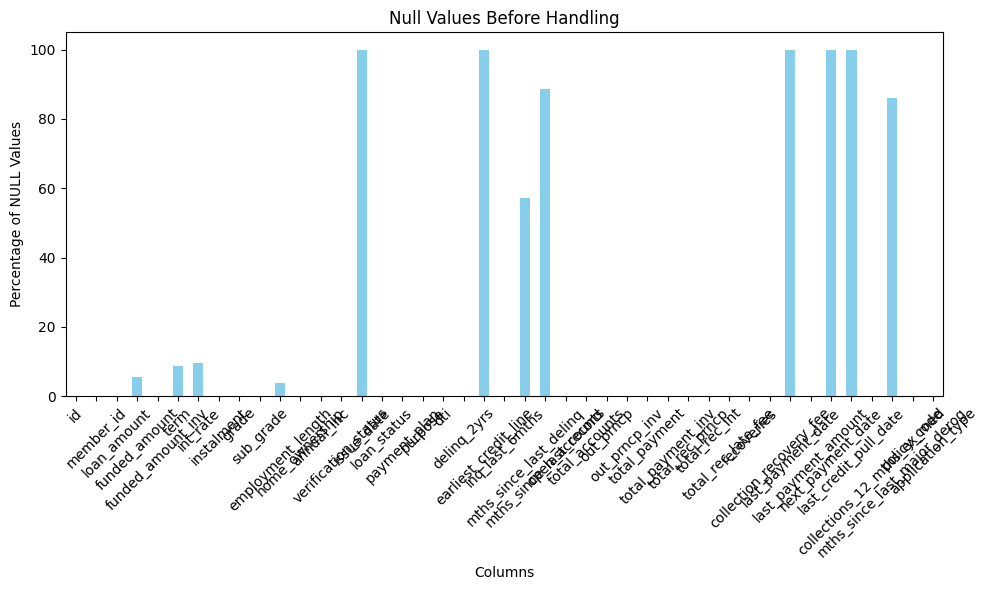

Null Values in DataFrame:
                             Null Counts  Null Percentage
id                                     0         0.000000
member_id                              0         0.000000
loan_amount                            0         0.000000
funded_amount                       3007         5.544799
funded_amount_inv                      0         0.000000
term                                4772         8.799395
int_rate                            5169         9.531449
instalment                             0         0.000000
grade                                  0         0.000000
sub_grade                              0         0.000000
employment_length                   2118         3.905515
home_ownership                         0         0.000000
annual_inc                             0         0.000000
verification_status                    0         0.000000
issue_date                         54231       100.000000
loan_status                            0      

/Users/ks/exploratory_data_analysis/dataframe_transform.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)
/Users/ks/exploratory_data_analysis/dataframe_transform.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

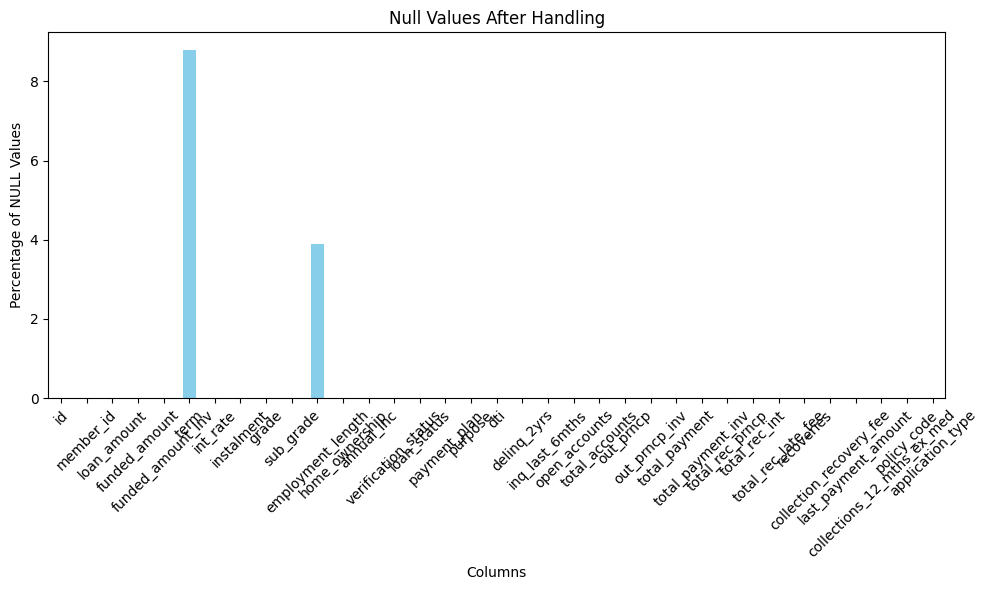

Null Values in DataFrame:
                            Null Counts  Null Percentage
id                                    0         0.000000
member_id                             0         0.000000
loan_amount                           0         0.000000
funded_amount                         0         0.000000
funded_amount_inv                     0         0.000000
term                               4772         8.799395
int_rate                              0         0.000000
instalment                            0         0.000000
grade                                 0         0.000000
sub_grade                             0         0.000000
employment_length                  2118         3.905515
home_ownership                        0         0.000000
annual_inc                            0         0.000000
verification_status                   0         0.000000
loan_status                           0         0.000000
payment_plan                          0         0.000000
purpo

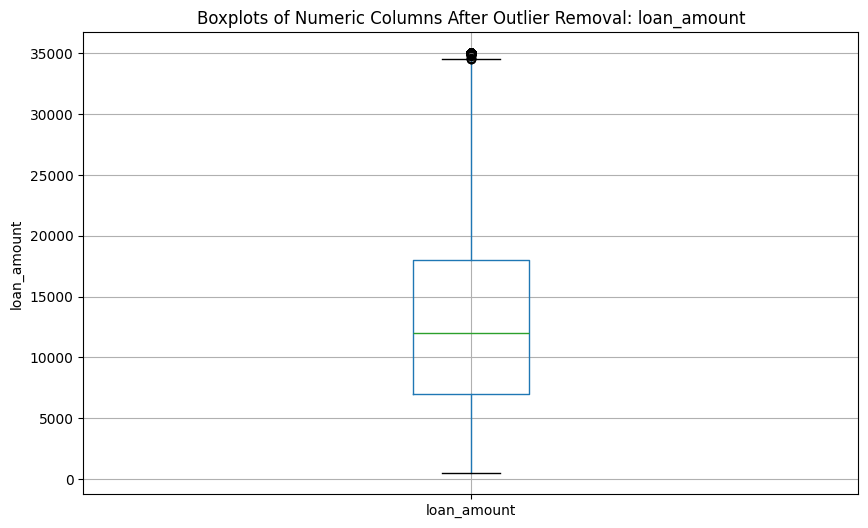

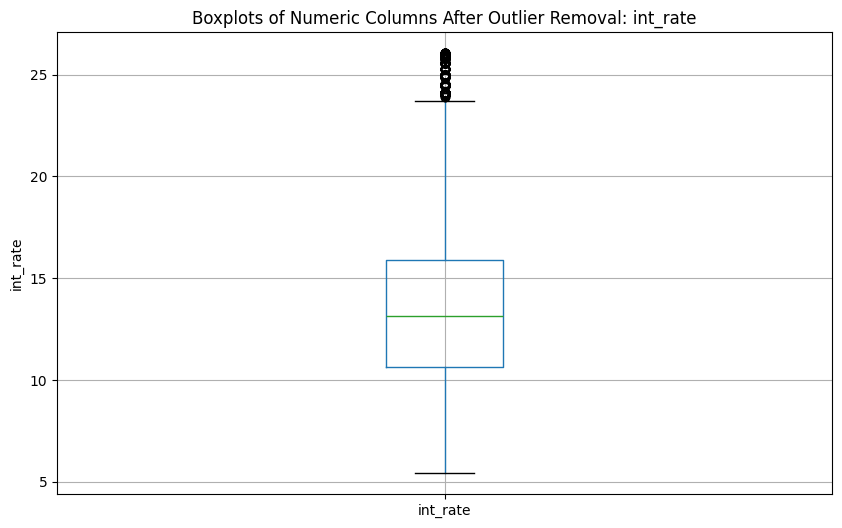

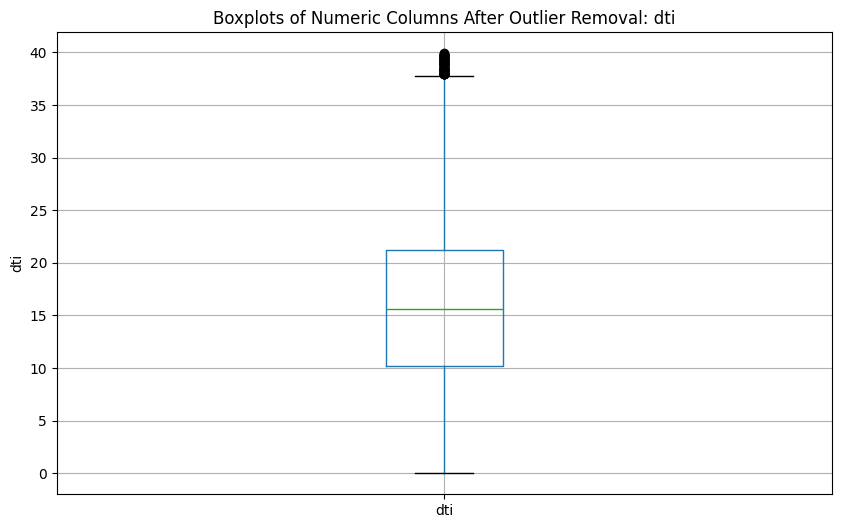

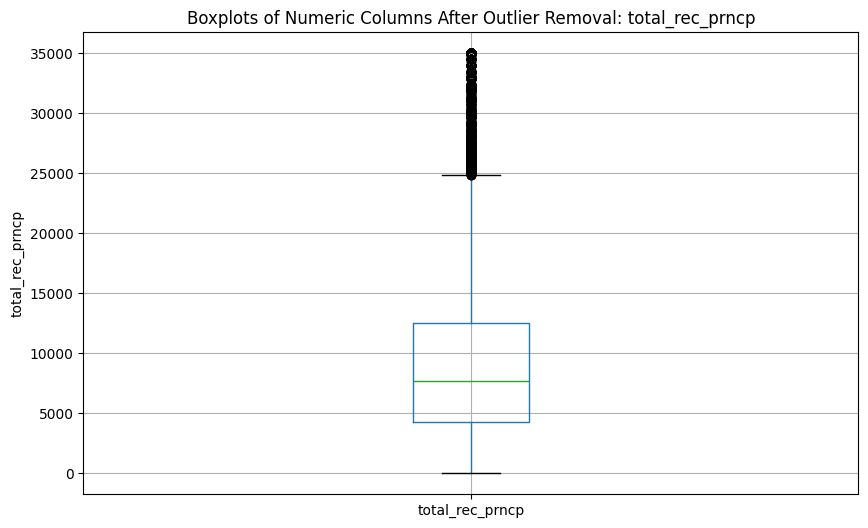

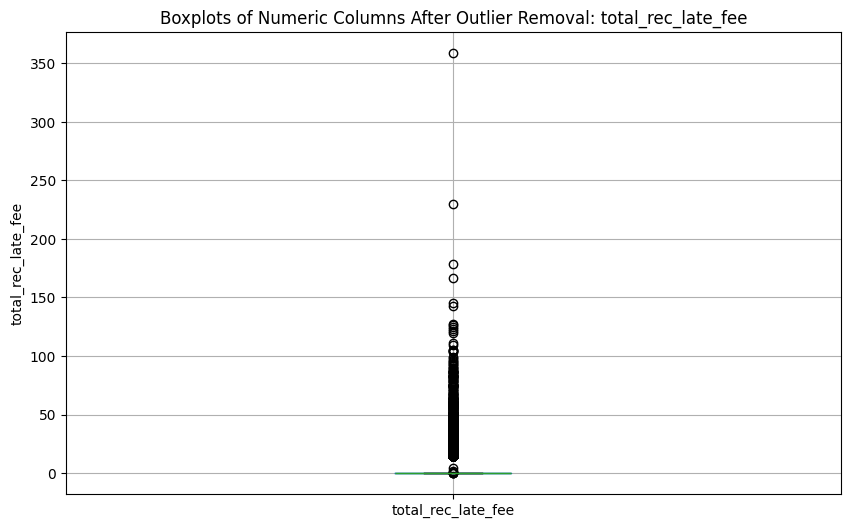

Transformed data with outliers removed saved to CSV successfully at /Users/ks/exploratory_data_analysis/output_data/transformed_data_outliers_removed.csv.


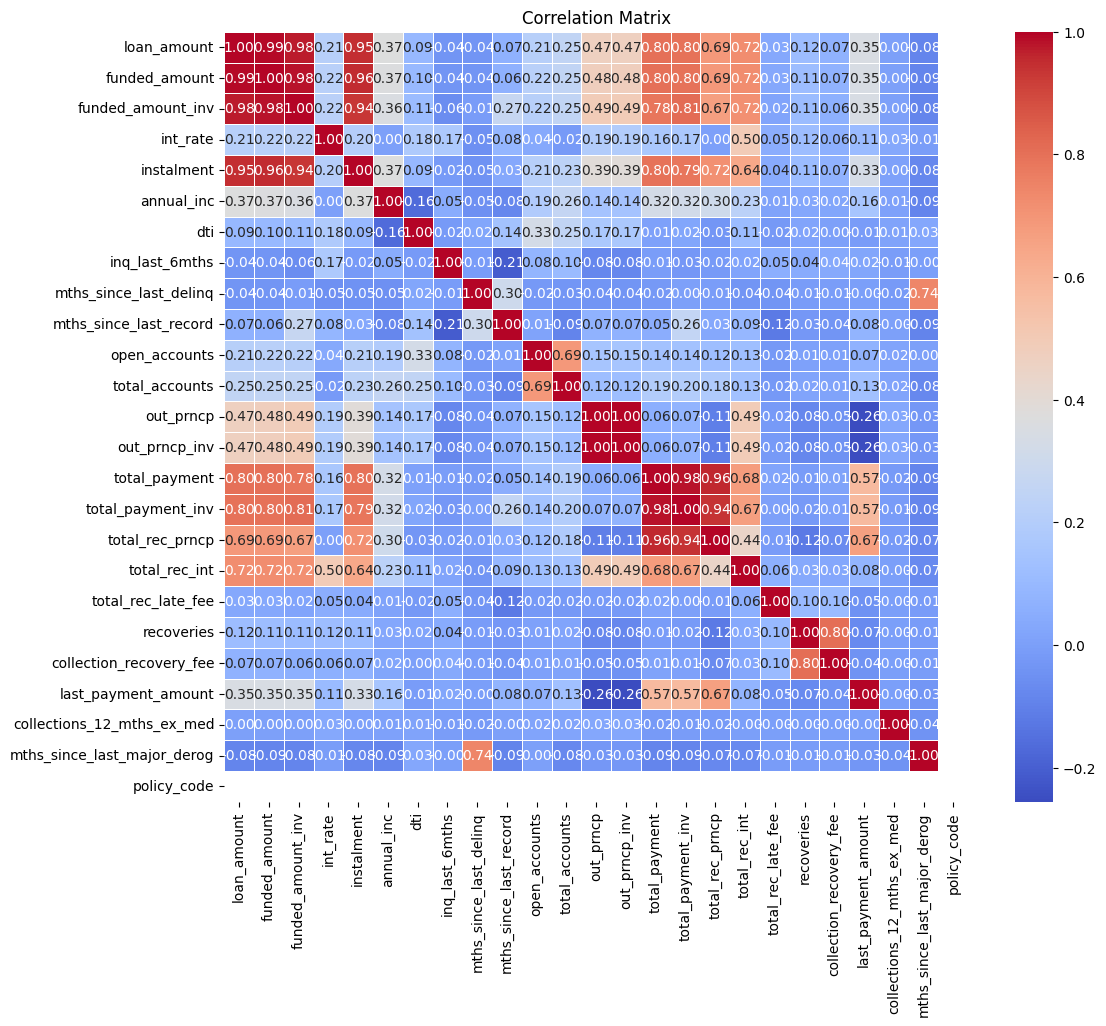

Highly correlated columns:
{'funded_amount_inv', 'funded_amount', 'instalment', 'total_payment_inv', 'out_prncp_inv', 'mths_since_last_major_derog', 'collection_recovery_fee', 'total_rec_int', 'total_payment', 'total_rec_prncp'}
Transformed data with outliers removed saved to CSV successfully at /Users/ks/exploratory_data_analysis/output_data/no_highly_correlated_data.csv.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from rds_databaseconnector import RDSDatabaseConnector, load_credentials
from scipy.stats import skew
from data_transform import DataTransform
from dataframe_info import DataFrameInfo
from dataframe_transform import DataFrameTransform, Plotter 

# Step 1: Load credentials and initialize database connector
credentials_path = "/Users/ks/exploratory_data_analysis/credentials.yaml"
credentials = load_credentials(credentials_path)
rds_connector = RDSDatabaseConnector(credentials)
rds_connector.ignition_switch()

# Step 2: Extract data from the database
query = "SELECT * FROM loan_payments"
data = rds_connector.extract_data(query)

# Step 3: Initialize and perform data transformations
transformer = DataTransform(data)

# Specify columns to transform
numeric_columns = [
    'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'dti', 'inq_last_6mths',
    'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp',
    'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'
]
datetime_columns = [
    'issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'
]
categorical_columns = [
    'id', 'member_id', 'term', 'grade', 'sub_grade', 'employment_length', 'home_ownership',
    'verification_status', 'loan_status', 'purpose', 'application_type', 'payment_plan', 'delinq_2yrs'
]
symbol_cleaning_columns = []  # Add columns if needed
symbols_to_remove = "?!$%"

# Perform necessary transformations
transformer.convert_to_numeric(numeric_columns)
transformer.convert_to_datetime(datetime_columns)
transformer.convert_to_categorical(categorical_columns)
if symbol_cleaning_columns:
    transformer.clean_symbols(symbol_cleaning_columns, symbols=symbols_to_remove)

# Get the transformed data
transformed_data = transformer.get_transformed_data()

# Step 4: Save the transformed data to CSV for further analysis
output_csv_path = "/Users/ks/exploratory_data_analysis/output_data/transformed_data.csv"
transformed_data.to_csv(output_csv_path, index=False)
print(f"Data saved to CSV successfully at {output_csv_path}.")

# Step 5: Perform EDA using DataFrameInfo class
df_info = DataFrameInfo(transformed_data)
df_info.summary()

# Step 6: Further EDA transformations and visualizations
df_transformer = DataFrameTransform(transformed_data)

# Plot the NULL values before handling
plotter = Plotter(df_transformer.get_transformed_data())
plotter.plot_null_values(title="Null Values Before Handling")

# Check and print the amount of NULL values
null_info_before = df_transformer.check_nulls()

# Drop columns with more than 50% NULL values
columns_to_drop = null_info_before[null_info_before['Null Percentage'] > 50].index.tolist()
df_transformer.drop_columns(columns_to_drop)

# Impute remaining NULL values with median
df_transformer.impute_missing(strategy='median')

# Plot NULL values after handling
plotter.plot_null_values(title="Null Values After Handling")

# Check and print amount of NULL values again
df_transformer.check_nulls()

# Identify and remove outliers
outlier_columns = ['loan_amount', 'int_rate', 'dti', 'total_rec_prncp', 'total_rec_late_fee']  # Example columns
df_transformer.remove_outliers(outlier_columns)

# Re-visualize data after removing outliers
plotter.plot_boxplots(outlier_columns, title="Boxplots of Numeric Columns After Outlier Removal")

# Save transformed DataFrame
transformed_output_csv_path = "/Users/ks/exploratory_data_analysis/output_data/transformed_data_outliers_removed.csv"
df_transformer.get_transformed_data().to_csv(transformed_output_csv_path, index=False)
print(f"Transformed data with outliers removed saved to CSV successfully at {transformed_output_csv_path}.")

# Compute correlation matrix
numeric_data = transformed_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated columns and decide which ones to remove
correlation_threshold = 0.7
highly_correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

print("Highly correlated columns:")
print(highly_correlated_columns)

# Remove highly correlated columns
transformed_data.drop(columns=highly_correlated_columns, inplace=True)

# Save the updated DataFrame
transformed_output_csv_path = "/Users/ks/exploratory_data_analysis/output_data/no_highly_correlated_data.csv"
transformed_data.to_csv(transformed_output_csv_path, index=False)
print(f"Transformed data with outliers removed saved to CSV successfully at {transformed_output_csv_path}.")
